In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set(rc={'figure.figsize':(10,8)})

In [2]:
df = pd.read_csv('computers.csv')
df.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


## Assumptions of Linear Regression

### 1. Assumptions about the form of the model
Linearity - The linear regression model Y = ß0 + ß1x1 + ß2x2 + ... + ßnxn + ∈
that relates the response Y to the predictors x1, x2...xn,  is assumed to be linear in the regression coefficients 
ß0, ß1....ßn , provided that if the relationship between the dependent and predictor variable(s) of the model is linear.

### 2. Assumptions about the errors

The errors are assumed to be normally distributed with mean zero and a common variance. (Errors are necessary to be normally distributed, not the indepenednt variables.) 

- Multivariate normality - The errors (also called as residues/residuals) of the model are normally distributed.

- The errors of the model have a mean of zero.

- Homoscedasticity principle - The errors of the model have same variance.  

-  Independance of errors - The errors of the model should be statistically independent of each other.

### 3.  Assumptions about the predictors

-  Lack of multicolinearity - The predictor variables x1, x2....xn are assumed to be linearly independent of each other. If this assumption is violated then the problem is referred to as the collinearity problem. Test of independence to determine collinearity is discussed in the multiple linear regression section.

And before building a linear regression model you need to check that these assumptions are true.

And then only you can proceed and be sure that you're building a good linear regression model.


## Validating the assumptions required for linear regression

### 1. Validating the Linearity Assumption Using Scatter Plot

The linearity of the relationship between the dependent and predictor variable(s) of the model can be studied using scatter plots.

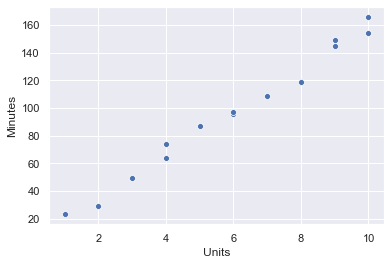

In [3]:
sns.scatterplot(data = df, x = 'Units', y = 'Minutes');

It can be observed that the time taken to repair a computer (in minutes) exhibits a linear relationship with the number of units being replaced.

If the relationship is not found to be linear in nature, then a non-linear regression analysis or a polynomial regression or data-transformation may be adopted for prediction.

### 2. Validating the Linearity Assumption Using Residuals vs. Fitted Plot

The assumption of linearity can also be validated using the residuals (errors) plotted against the fitted values. The fitted values are the predicted values of the dependent variable. The plot of errors vs. fitted values for linear regression model given as:
> The estimated time taken to repair a computer = 4.161654 + (15.50877 x Units being replaced)

#### Reference:
- [reshape(-1)](https://stackoverflow.com/a/42510505)
- [Seaborn residplot](https://seaborn.pydata.org/generated/seaborn.residplot.html)
- [Lowess smoothing](https://www.statisticshowto.datasciencecentral.com/lowess-smoothing/)
- [Seaborn residplot youtube](https://www.youtube.com/watch?v=vrTNUGehZNY)

In [4]:
df['Units']

0      1
1      2
2      3
3      4
4      4
5      5
6      6
7      6
8      7
9      8
10     9
11     9
12    10
13    10
Name: Units, dtype: int64

In [5]:
type(df.loc[:,["Units"]])

pandas.core.frame.DataFrame

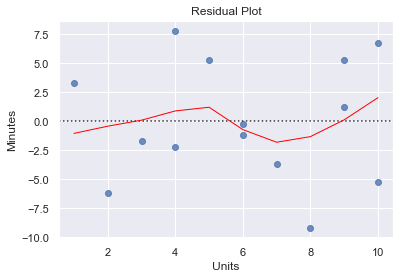

In [6]:
# lowess to residual plot help in determining if there is structure to residuals.
fig = plt.figure()
ax = sns.residplot(x = 'Units', y = 'Minutes',data = df, lowess=True, # lowess draws the line 
             line_kws = {'color':'red', 'lw':1}); 
ax = plt.xlabel('Units')
ax = plt.title('Residual Plot')

It can be observed that the above plot does not follow any specific pattern. This is an indicator that the relationship between the dependent and predictor variables is linear in nature. If the residual vs. fitted values plot exhibits any pattern then the relationship may be non-linear.

### Observation

In general, it can also be observed from the residuals vs fitted values plot that, observations that lie close to the horizontal line (residuals = 0 ) are predicted with higher accuracy whilst that below the horizontal line are overpredicted. That is the predicted value is higher than the observed value. On the other hand, the observations that lie above the horizontal line are underpredicted i.e. the predicted value is lower than the observed value.

![](images/residplot.PNG)
***
***

### [Sklearn Linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()
model.fit(X = df.loc[:,["Units"]], y= df.loc[:,["Minutes"]])  # pass x and y as dataframe

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
predictions = model.predict(df.loc[:,["Units"]])
predictions

array([[ 19.67042607],
       [ 35.17919799],
       [ 50.68796992],
       [ 66.19674185],
       [ 66.19674185],
       [ 81.70551378],
       [ 97.21428571],
       [ 97.21428571],
       [112.72305764],
       [128.23182957],
       [143.7406015 ],
       [143.7406015 ],
       [159.24937343],
       [159.24937343]])

## Validating the Assumption That Errors are Normally Distributed

A linear regression model is said to be valid if its errors (residuals) are normally distributed. __A Normal Q-Q plot can be used to validate this assumption.__

__OR__ Using The Shapiro-Wilk test - it tests the null hypothesis that the data was drawn from a normal distribution. ( For N > 5000 the W test statistic is accurate but the p-value may not be.)

#### Reference:

- [Q-Q plot statisticshowto](https://www.statisticshowto.datasciencecentral.com/q-q-plots/)
- [understanding-Q-Q-plots](https://data.library.virginia.edu/understanding-q-q-plots/)
- [QQ plot statsmodel library](http://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html)
- [scipy stats probplot qq plot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html#scipy.stats.probplot)
- [Shapiro-wilk test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

![](images/qq-plot.jpg)

In [10]:
residuals = df["Minutes"] - predictions.reshape(-1)

In [11]:
import statsmodels.api as sm   # for plotting qq plot

In [12]:
import scipy.stats as stats

Text(0.5, 1.0, 'Normal Q-Q Plot')

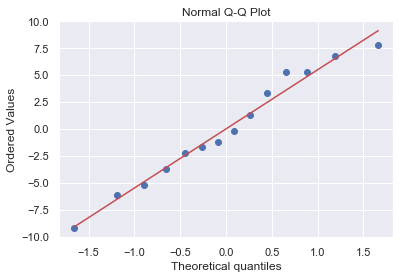

In [13]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

#### Alternate, using shapiro-wilk test

In [14]:
stats.shapiro(residuals)  # (test_statistic, p-value)

(0.9674058556556702, 0.8401687741279602)

p-value: 0.05

For a significance level of 0.05, the p-value obtained from the Shapiro-Wilk test suggests that the model abides by the assumption of normality since the p-value is greater than the chosen significance level.

## Validating the Assumption of Homoscedasticity
For a linear regression model to be valid for any statistical inference/prediction it is essential that the errors (residuals) of the model be homoscedastic in nature.

In statistics, a sequence or a vector of random variables is homoscedastic if all random variables in the sequence or vector have the same finite variance. This is also known as homogeneity of variance.

The homoscedasticity of the residuals obtained for our best fit model can be examined using the __scale-location plot__. __The scale-location plot depicts the square rooted standardized residual vs. predicted value obtained using the best fit model. Standardized residuals are residuals scaled such that they have a mean of 0 and variance of 1.__

The linear regression model is said to abide by the homoscedasticity assumption if there is no specific pattern observed in the scale-location plot. The scale-location plot of the best fit model for the computer repairs data set is as shown below.

[Seaborn regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)

In [15]:
# square rooted standardized residual
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

Text(0.5, 0, 'Fitted value')

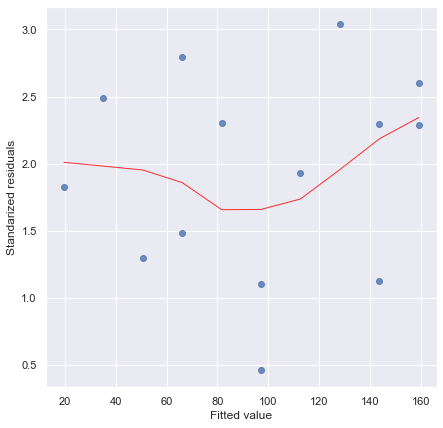

In [16]:
plt.figure(figsize=(7,7))
sns.regplot(predictions.reshape(-1), model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

It can be observed in the above plot that there is no specific pattern. In general, the homoscedasticity is said to be violated if:

- The residuals seem to increase or decrease in average magnitude with the fitted values, it is an indication that the variance of the residuals is not constant.

- The points in the plot lie on a curve around zero, rather than fluctuating randomly.

- A few points in the plot lie a long way from the rest of the points.

***

Having created the best fit linear regression model, shown below, for the given sample data set, we should also determine if this model is useful.
> Time taken to repair a computer ≈ 4.161654 + (15.50877 x Units being replaced)

# Coefficient of determination -  $R^2 = \frac{SSR}{SST}$

The usefulness of a linear regression model for a data set with an outcome variable Y and a predictor variable X, having a linear relationship modeled using simple linear regression can be determined using the __coefficient of determination ($R^2$)__.

__SSR - Sum of squared regressions__ - Sum of squared Deviations of predicted values $\widehat{y_{i}}$ from mean $\bar{y}$

> $SSR = \sum(\widehat{y_{i}} - \bar{y})^{2}$

__SST - Sum of squared total__ - total sum of squared deviations of actual values $y_{i}$ from its mean $\bar{y}$

> $SST = \sum(y_{i}- \bar{y})^{2}$

SST can be thought of as the error in predicting Y without the knowledge of X.

The sum of squared total (SST) can also be expressed in terms of sum of squared regression (SSR) and sum of squared errors (SSE) as,
> __SST = SSR + SSE__.

> $ \sum(y_{i} - \bar{y})^{2} = \sum(\widehat{y_{i}} - \bar{y})^{2} + \sum(y_{i} - \widehat{y_{i}})^{2}$

#### Calculating $R^2$

In [17]:
# score() of the model directly computes the R2 value.
Rsq = model.score(df[['Units']], df[['Minutes']])
Rsq

0.9874371980620736

An $R^2$ value of 0.9874372 indicates that 98.74 % of the variability observed in the dependent variable (time taken to repair computer) can be explained by variability in the predictor variable (units being replaced) in this sample data set.

$R^2$ can take values in the range 0 and 1. The higher the value of $R^2$, the more useful is the model.

##### Alternate way to calculate $R^2$

In [18]:
SST = sum((df.Minutes - df.Minutes.mean())**2)
SST

27768.357142857145

In [19]:
SSE = sum(residuals**2)
SSE

348.84837092731783

In [20]:
SSR = SST - SSE
SSR

27419.508771929828

In [21]:
Rsq2 = SSR/SST
Rsq2

0.9874371980620736

### The summary command

The built linear regression model can be analyzed or estimated using some additional statistical parameters and methods like  $R^2$, Adjusted $R^2$, p-value, t-statistic, F-statistic etc. All this statistical information can be achieved together in one go using summary() function. This function is available for a model built using statsmodels module.

> $y = \beta_{0} + \beta_{1}x_1 + \epsilon$

Lets fit a linear regression model on the same computers data using statsmodels.

In [22]:
import statsmodels.api as sm

In [23]:
X = sm.add_constant(df[['Units']])
y = df['Minutes']

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
model_sm = sm.OLS(y, X).fit()

Here, the Ordinary Least Square(OLS) method is used for fitting a regression model.

The summary() method provides additional details of the obtained best fit model as shown below.

In [25]:
model_sm.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutes   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           8.92e-13
Time:                        21:40:17   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1617      3.355      1.240      0.239      -3.148      11.472
Units         15.5088      0.505     30.712      0.000      14.409      16.609
==============================================================================
Omnibus:                        0.746   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.624
Skew:                          -0.069   Prob(JB):                        0.732
Kurtosis:                       1.975   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept $\beta_0$ for the obtained linear regression model is 4.1617, whereas $\beta_1$ is approximately 15.508.

Similarly, the $R^2$ value and Adjusted $R^2$ value are 0.987 and 0.986 respectively.

The adjusted R-squared also indicates the usefulness of the regression model. The adjusted R-squared value takes into account the number of predictor variables as compared to multiple R-squared.

### Understanding the usefulness of X as a predictor of Y using hypothesis testing

An alternate way of determining the usefulness of X as a predictor of Y is to conduct a test of hypothesis about the regression parameter $\beta_1$.

- The __null hypothesis $H_0$__ : $\beta_1 = 0$  indicates that the regression coefficient $\beta_1$ is insignificant for the model.

In order __to validate the null hypothesis, t-test is used__. The null hypothesis is rejected if the p-value is less than or equal to the significance value.

For a significance level of 0.05, the best fit model obtained for computer repairs data has a p-value of 0.000(as shown below). The null hypothesis can thus be rejected since the p-value (0.000) is less than the significance level of 0.05

![](images/hypo_test.PNG)

In addition to the t-test (which helps understand the usefulness of X as a predictor of Y), __the overall significance of the model can be suggested by the F-test.__

For a given significance level the null hypothesis (i.e. all the regression coefficients of the model are zero) can be rejected if the p-value for the F-test is less than the significance level.

For a significance level of 0.05, the null hypothesis for the F-test can be rejected since the p-value 8.916e-13 (as shown above) is less than the significance level of 0.05. The F-test for the given sample data thus suggests that the obtained best fit model is significant.